In [1]:
# https://pypi.org/project/stockstats/#description

In [1]:
import pandas as pd
from stockstats import wrap
from stockstats import StockDataFrame as sdf
pd.set_option('display.max_columns', 500)
# data = pd.read_csv('stock.csv')
# df = wrap(data)

In [2]:
import yfinance as yf

# Disable multi-level index when downloading data, doing it for AWL.NS - Adani Wilmar
data = yf.download('AWL.NS', multi_level_index=False,interval = '5m' ,start ='2024-12-30', end ='2024-12-31',ignore_tz=True )
#ignore_tz above is used to get data in IST for Adani Wilmar (Indian stock)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AWL.NS']: YFPricesMissingError('possibly delisted; no price data found  (5m 2024-12-30 -> 2024-12-31) (Yahoo error = "5m data not available for startTime=1735497000 and endTime=1735583400. The requested range must be within the last 60 days.")')


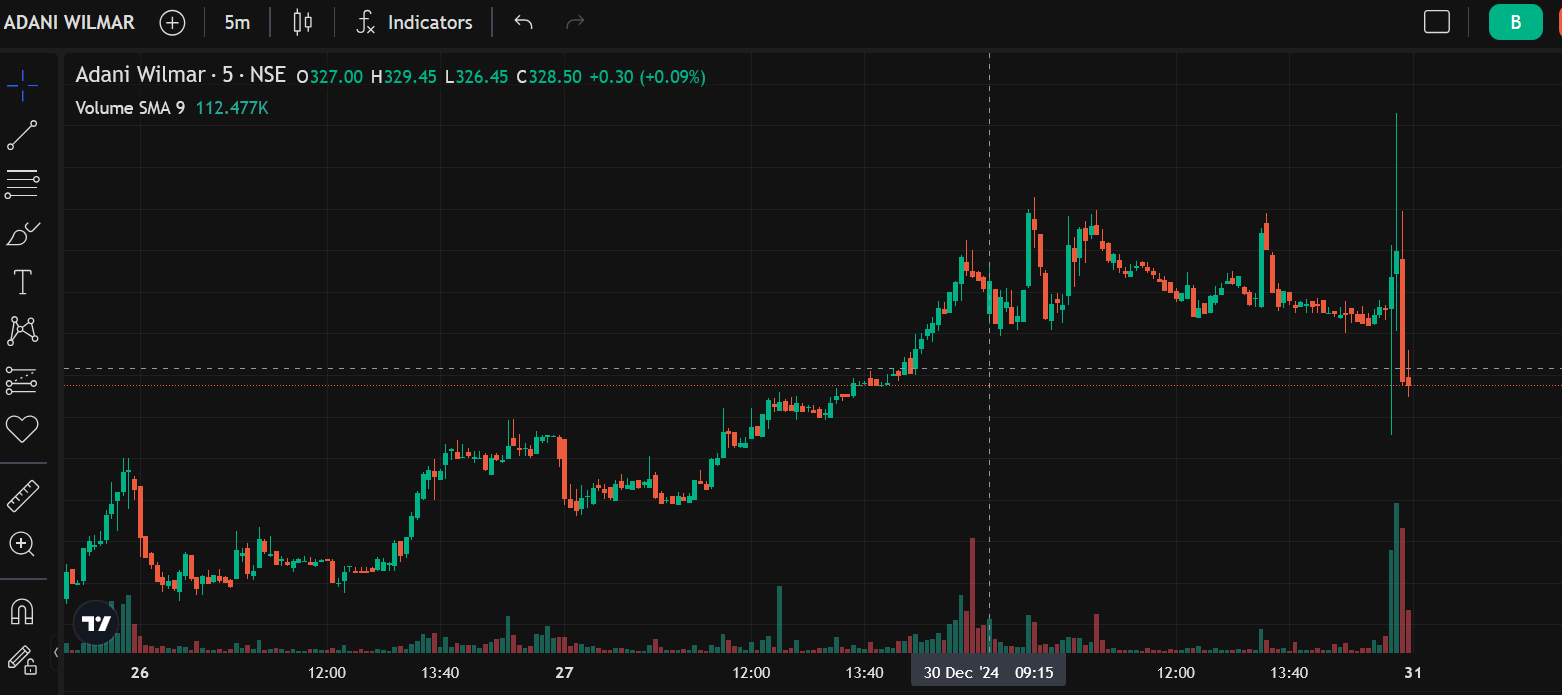
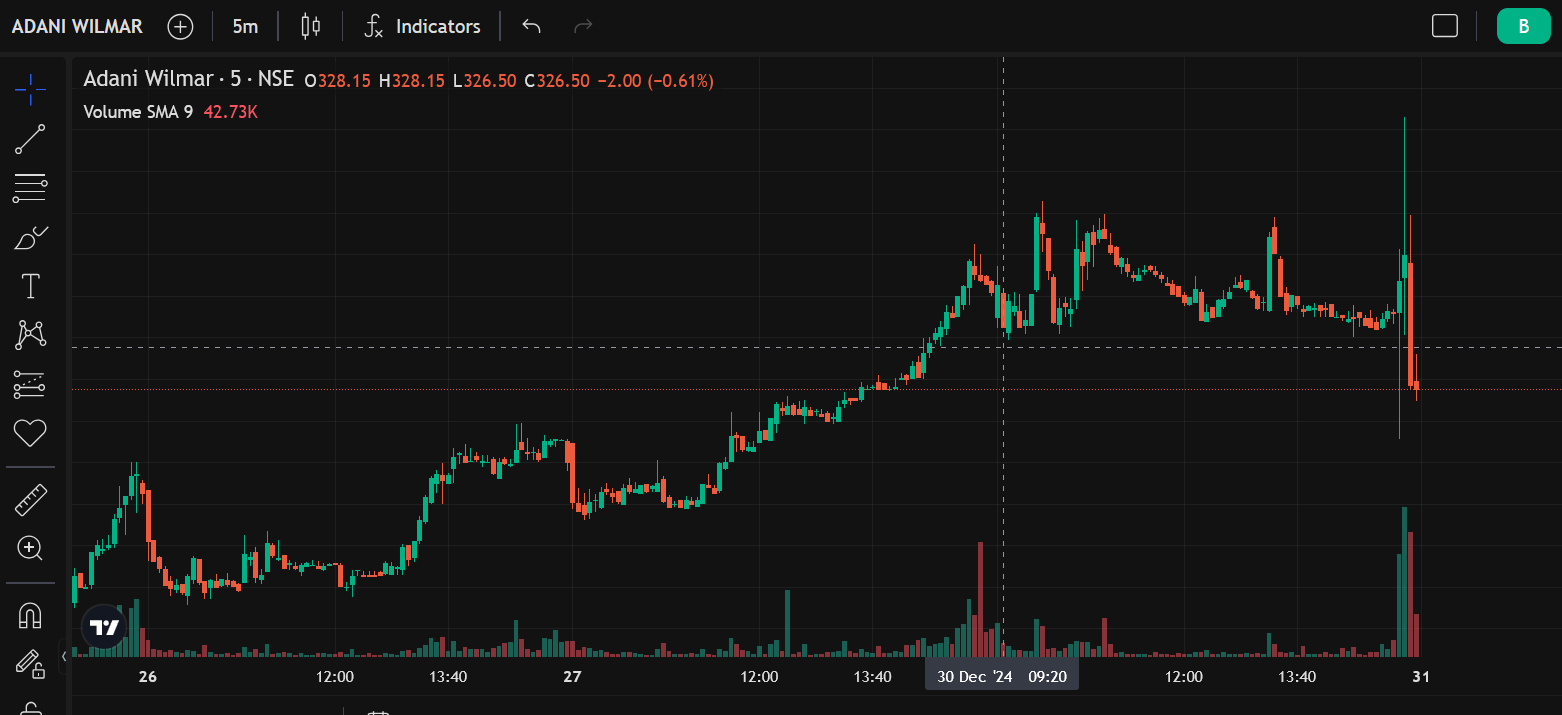
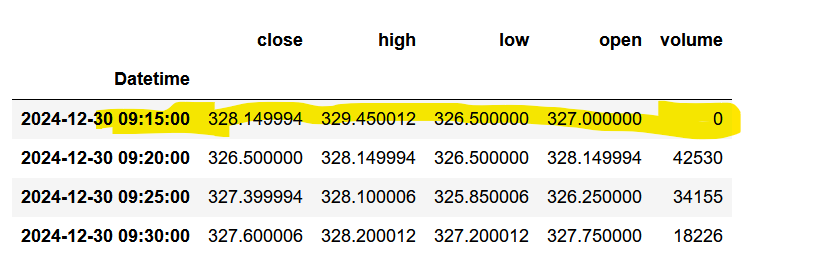

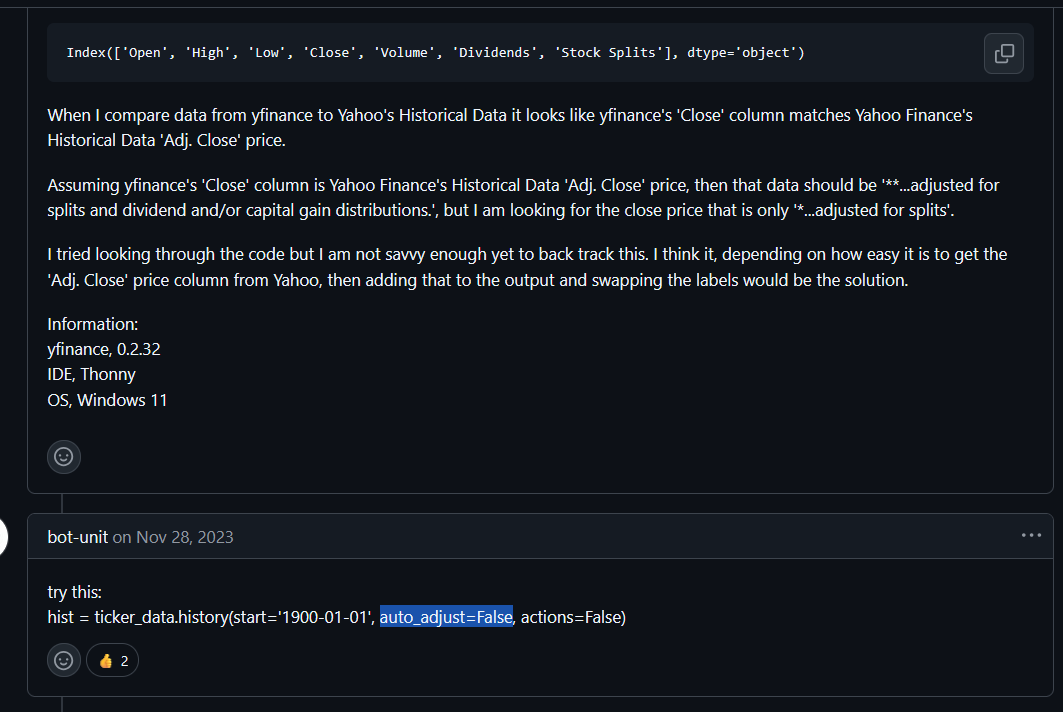

In [3]:
import yfinance as yf

# Disable multi-level index when downloading data, doing it for AWL.NS - Adani Wilmar
data = yf.download('AWL.NS', multi_level_index=False )
#ignore_tz above is used to get data in IST for Adani Wilmar (Indian stock)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = wrap(data)
df.tail(1000)

,close,high,low,open,volume
Date,,,,,
2022-02-08,268.250000,271.250000,227.000000,227.000000,135533461
2022-02-09,321.899994,321.899994,272.000000,273.649994,70655011
2022-02-10,386.250000,386.250000,345.000000,356.700012,56509643
2022-02-11,381.000000,419.899994,351.250000,408.700012,88580117
2022-02-14,376.299988,398.899994,352.100006,364.200012,43047644
...,...,...,...,...,...
2025-02-27,245.750000,259.100006,243.949997,259.000000,1464119
2025-02-28,246.149994,247.399994,240.149994,244.899994,2014703
2025-03-03,242.720001,250.679993,233.940002,246.300003,1876678


In [5]:
stock=sdf.retype(data)   

# RSI has a configurable window. The default window size is 14 which is configurable through 
# stock['rsi']: 14 periods RSI
# stock['rsi_6']: 6 periods RSI

stock.get('rsi')

Date
2022-02-08           NaN
2022-02-09    100.000000
2022-02-10    100.000000
2022-02-11     95.281451
2022-02-14     91.135534
                 ...    
2024-12-23     53.577105
2024-12-24     55.287928
2024-12-26     56.669821
2024-12-27     61.408162
2024-12-30     61.018554
Name: rsi, Length: 713, dtype: float64

In [6]:
stock

,close,high,low,open,volume,rsi
Date,,,,,,
2022-02-08,268.250000,271.250000,227.000000,227.000000,135533461,NaN
2022-02-09,321.899994,321.899994,272.000000,273.649994,70655011,100.000000
2022-02-10,386.250000,386.250000,345.000000,356.700012,56509643,100.000000
2022-02-11,381.000000,419.899994,351.250000,408.700012,88580117,95.281451
2022-02-14,376.299988,398.899994,352.100006,364.200012,43047644,91.135534
...,...,...,...,...,...,...
2024-12-23,315.850006,318.899994,290.200012,294.899994,5245677,53.577105
2024-12-24,318.649994,320.000000,310.649994,315.850006,2201189,55.287928
2024-12-26,320.899994,322.000000,313.000000,318.649994,1722984,56.669821


In [ ]:
# Moving average convergence/divergence (MACD) is a technical indicator to help investors identify entry points for buying or selling.
# The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
# The signal line is a nine-period EMA of the MACD line.
# MACD is best used with daily periods, where the traditional settings of 26/12/9 days is the default.

In [7]:
stock.get('macd')

Date
2022-02-08    0.000000
2022-02-09    1.203686
2022-02-10    3.529224
2022-02-11    4.310883
2022-02-14    4.457846
                ...   
2024-12-23   -5.210595
2024-12-24   -3.736693
2024-12-26   -2.359855
2024-12-27   -0.592134
2024-12-30    0.763683
Name: macd, Length: 713, dtype: float64

In [8]:
stock.get('high_-1_d')

Date
2022-02-08     0.000000
2022-02-09    50.649994
2022-02-10    64.350006
2022-02-11    33.649994
2022-02-14   -21.000000
                ...    
2024-12-23    18.549988
2024-12-24     1.100006
2024-12-26     2.000000
2024-12-27     8.549988
2024-12-30     6.500000
Name: high_-1_d, Length: 713, dtype: float64

In [9]:
stock.init_all()

In [10]:
stock

,close,high,low,open,volume,rsi,macd,macds,macdh,high_-1_d,rate,middle,tp,boll,boll_ub,boll_lb,pvo,pvos,pvoh,ppo,ppos,ppoh,qqe,qqel,qqes,cr,cr-ma1,cr-ma2,cr-ma3,tr,dx,adx,adxr,log-ret,wt1,wt2,supertrend_ub,supertrend_lb,supertrend,bop,cti,eribull,eribear,rvgi,rvgis,kst,num,ao,aroon,atr,cci,change,chop,cmo,coppock,dma,ichimoku,inertia,ftr,kama,kdjk,kdjd,kdjj,ker,mfi,ndi,pdi,pgo,psl,rsv,stochrsi,tema,trix,wr,vr,vwma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-08,268.250000,271.250000,227.000000,227.000000,135533461,NaN,0.000000,0.000000,0.000000,0.000000,NaN,255.500000,255.500000,268.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,55.263158,55.263158,55.263158,55.263158,44.250000,NaN,NaN,NaN,0.000000,NaN,NaN,381.875000,116.375000,381.875000,0.932203,0.000000,3.000000,-41.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,44.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,268.250000,64.406780,54.802260,83.615819,0.000000,0.500000,-0.000000,0.000000,0.000000,0.000000,93.220339,NaN,268.250000,0.000000,-6.779661,100.000000,255.500000
2022-02-09,321.899994,321.899994,272.000000,273.649994,70655011,100.000000,1.203686,0.668714,0.534971,50.649994,19.999998,305.266663,305.266663,295.074997,370.947546,219.202448,-1.429215,-0.794008,-0.635207,0.406504,0.225836,0.180668,0.000000,0.000000,0.0,288.245593,55.263158,55.263158,55.263158,53.649994,100.000000,100.000000,100.000000,0.182322,121.212121,121.212121,381.875000,149.577784,381.875000,0.966934,0.000000,45.985709,-3.914285,0.000000,0.000000,0.000000,0.0,0.000000,4.0,49.124071,66.666667,19.999998,1.179317,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,295.074997,76.271186,61.958569,104.896422,1.000000,0.500000,-0.000000,53.462507,0.544275,8.333333,100.000000,NaN,318.466394,3.178530,-0.000000,204.262092,272.553641
2022-02-10,386.250000,386.250000,345.000000,356.700012,56509643,100.000000,3.529224,1.841055,1.688170,64.350006,19.990683,372.500000,372.500000,325.466665,443.628263,207.305066,-2.680513,-1.567166,-1.113347,1.074364,0.573593,0.500771,0.000000,0.000000,0.0,572.397654,55.263158,55.263158,55.263158,64.350006,100.000000,100.000000,100.000000,0.182244,122.457530,121.834826,381.875000,201.885603,201.885603,0.716363,0.000000,94.573470,53.323470,0.000000,0.000000,0.000000,0.0,0.000000,8.0,54.579799,100.000000,19.990683,0.707187,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.466665,84.180791,69.365976,113.810421,1.000000,0.500000,-0.000000,73.122728,1.104342,16.666667,100.000000,NaN,380.016925,3.661033,-0.000000,287.650567,294.053350
2022-02-11,381.000000,419.899994,351.250000,408.700012,88580117,95.281451,4.310883,2.677717,1.633166,33.649994,-1.359223,384.049998,384.049998,339.349998,450.669630,228.030367,-1.690133,-1.608821,-0.081312,1.256185,0.804823,0.451362,0.000000,0.000000,0.0,423.182563,55.263158,55.263158,55.263158,68.649994,100.000000,100.000000,100.000000,-0.013685,109.209500,117.626384,561.067397,210.082597,210.082597,-0.403496,0.000000,115.462968,46.812974,0.573001,0.000000,0.000000,0.0,0.000000,12.0,58.497467,74.532503,-1.359223,6.813524,91.480730,0.000000,0.000000,0.000000,0.000000,0.000000,339.349998,82.731898,73.821284,100.553128,0.914807,0.500000,-0.000000,65.245821,0.703501,16.666667,79.834113,0.000000,388.943408,3.295489,-20.165887,124.678807,316.747365
2022-02-14,376.299988,398.899994,352.100006,364.200012,43047644,91.135534,4.457846,3.207265,1.250581,-21.000000,-1.233599,375.766663,375.766663,346.739996,448.653129,244.826864,-3.652657,-2.216816,-1.435841,1.270566,0.943371,0.327195,0.000000,0.000000,0.0,275.867006,171.754375,55.263158,55.263158,46.799988,100.000000,100.000000,100.000000,-0.012413,93.292628,111.542945,542.897144,210.082597,210.082597,0.258547,0.000000,84.196831,37.396843,0.381232,0.000000,0.000000,0.0,0.000000,12.0,55.799048,53.162561,-1.233599,13.806803,84.447032,0.000000,0.000000,0.000000,0.000000,0.000000,34

In [11]:
stock[['close', 'close_-1_s', 'close_2_s']]

C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\stockstats.py:2019: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.rename(_lower_col_name, axis='columns', inplace=True)


,close,close_-1_s,close_2_s
Date,,,
2022-02-08,268.250000,268.250000,386.250000
2022-02-09,321.899994,268.250000,381.000000
2022-02-10,386.250000,321.899994,376.299988
2022-02-11,381.000000,386.250000,383.850006
2022-02-14,376.299988,381.000000,377.049988
...,...,...,...
2024-12-23,315.850006,290.899994,320.899994
2024-12-24,318.649994,315.850006,329.200012
2024-12-26,320.899994,318.649994,328.750000


In [12]:
stock['log-ret']

Date
2022-02-08    0.000000
2022-02-09    0.182322
2022-02-10    0.182244
2022-02-11   -0.013685
2022-02-14   -0.012413
                ...   
2024-12-23    0.082288
2024-12-24    0.008826
2024-12-26    0.007036
2024-12-27    0.025536
2024-12-30   -0.001368
Name: log-ret, Length: 713, dtype: float64

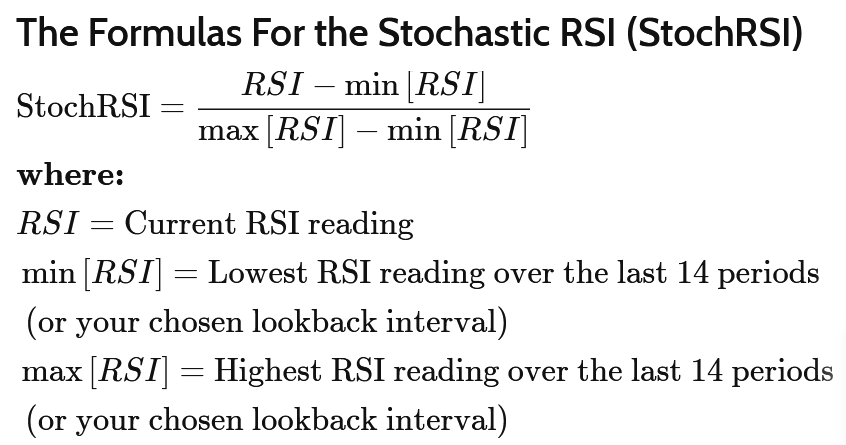

In [13]:
# Stochastic RSI gives traders an idea of whether the current RSI value is overbought or oversold. It takes a window parameter.

# The default window is 14. Use set_dft_window('stochrsi', n) to tune it.

# Examples:

# df['stochrsi']: retrieve the Stochastic RSI of 14 periods
# df['stochrsi_6']: retrieve the Stochastic RSI of 6 periods

stock[['stochrsi','rsi']]

C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\stockstats.py:2019: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.rename(_lower_col_name, axis='columns', inplace=True)


,stochrsi,rsi
Date,,
2022-02-08,NaN,NaN
2022-02-09,NaN,100.000000
2022-02-10,NaN,100.000000
2022-02-11,0.000000,95.281451
2022-02-14,0.000000,91.135534
...,...,...
2024-12-23,100.000000,53.577105
2024-12-24,100.000000,55.287928
2024-12-26,100.000000,56.669821


Williams Overbought/Oversold index is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels.

It takes a window parameter. The default window is 14. Use set_dft_window('wr', n) to change the default window.

Examples:

    df['wr'] retrieves the 14 periods WR.
    df['wr_6'] retrieves the 6 periods WR.


In [14]:
stock['wr']

Date
2022-02-08    -6.779661
2022-02-09    -0.000000
2022-02-10    -0.000000
2022-02-11   -20.165887
2022-02-14   -22.602389
                ...    
2024-12-23   -10.553593
2024-12-24    -4.500020
2024-12-26    -3.437519
2024-12-27    -3.329164
2024-12-30   -17.640786
Name: wr, Length: 713, dtype: float64

The DMI helps traders determine the strength and direction of price trends. Developed by J. Welles Wilder in 1978, the DMI identifies the direction in which an asset price is moving. The DMI does this by comparing earlier highs and lows and drawing two lines: a positive directional movement line, called "+DI," and a negative directional movement line, called "-DI." A third line, the average directional index (ADX), can also gauge the strength of upward or downward trends.1

When +DI is above -DI, the price has more upward pressure than downward pressure. Conversely, if -DI is above +DI, the price has more downward pressure. This helps traders assess the trend direction. Crossovers between the lines are also used as signals to buy or sell.




    The directional movement index (DMI) measures both the strength and direction of a price movement and is used to reduce false signals.
    The DMI employs two standard indicators, one negative (-DI) and one positive (+DI), with a third, the average directional index (ADX), which is nondirectional but shows momentum.
    The larger the spread between the two primary lines, the stronger the price trend. If +DI is way above -DI, the price trend is strongly up. If -DI is way above +DI, then the price trend is strongly down.
    ADX measures the strength of the trend, either up or down. If it's above 25, that indicates a strong trend.

The stochastic oscillator is a momenxtum indicator that uses support and resistance levels.

It includes three lines:

    df['kdjk'] - K series
    df['kdjd'] - D series
    df['kdjj'] - J series

The default window is 9. Use set_dft_window('kdjk', n) to change it. Use df['kdjk_6'] to retrieve the K series of 6 periods.

KDJ also has two configurable parameters named StockDataFrame.KDJ_PARAM. The default value is (2.0/3.0, 1.0/3.0)

In [18]:
stock['kdjk']

Date
2022-02-08    64.406780
2022-02-09    76.271186
2022-02-10    84.180791
2022-02-11    82.731898
2022-02-14    80.953803
                ...    
2024-12-23    36.842246
2024-12-24    56.394824
2024-12-26    69.784043
2024-12-27    78.746307
2024-12-30    79.950609
Name: kdjk, Length: 713, dtype: float64

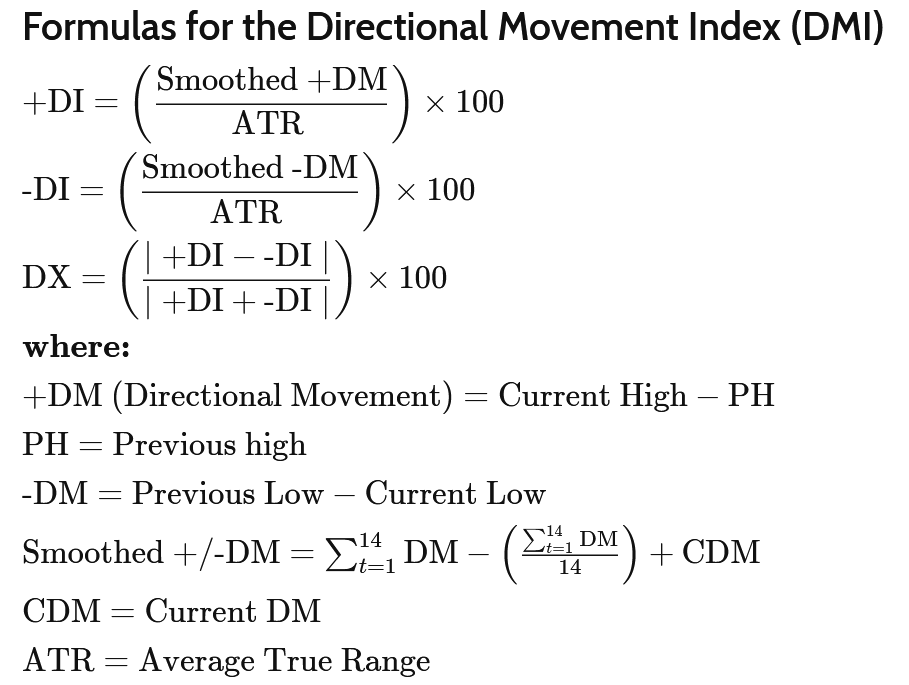

The true range indicator is taken as the greatest of the following: current high less the current low; the absolute value of the current high less the previous close; and the absolute value of the current low less the previous close. The ATR is then a moving average, generally using 14 days, of the true ranges

The directional movement index (DMI) identifies in which direction the price of an asset is moving.

It has several lines:

    df['pdi'] is the positive directional movement line (+DI)
    df['ndi'] is the negative directional movement line (-DI)
    df['dx'] is the directional index (DX)
    df['adx'] is the average directional index (ADX)
    df['adxr'] is an EMA for ADX

It has several parameters.

    default window for +DI is 14, change it with set_dft_window('pdi', n)
    default window for -DI is 14, change it with set_dft_window('ndi', n)
    StockDataFrame.DX_SMMA - window for DX, default to 14
    StockDataFrame.ADX_EMA - window for ADX, default to 6
    StockDataFrame.ADXR_EMA - window for ADXR, default to 6


In [20]:
stock[['pdi','ndi','adxr']]

C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\stockstats.py:2019: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value.rename(_lower_col_name, axis='columns', inplace=True)


,pdi,ndi,adxr
Date,,,
2022-02-08,0.000000,-0.000000,NaN
2022-02-09,53.462507,-0.000000,100.000000
2022-02-10,73.122728,-0.000000,100.000000
2022-02-11,65.245821,-0.000000,100.000000
2022-02-14,52.622061,-0.000000,100.000000
...,...,...,...
2024-12-23,24.923340,25.311047,22.401733
2024-12-24,24.040194,23.612282,20.182238
2024-12-26,23.921940,22.076370,17.729844


Came across another indicator similar to DMI which is Aroon Indicator

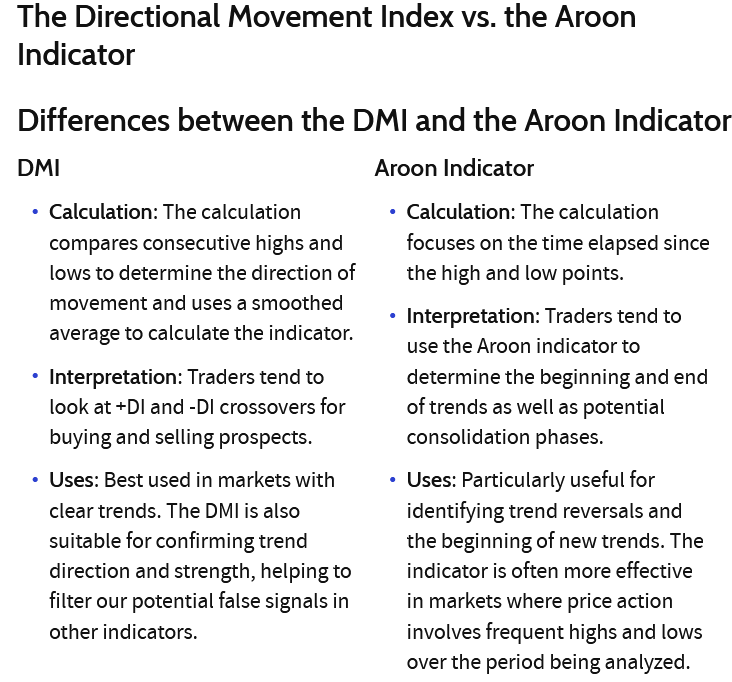

The Aroon Oscillator measures the strength of a trend and the likelihood that it will continue.

The default window is 25.

    Aroon Oscillator = Aroon Up - Aroon Down
    Aroon Up = 100 * (n - periods since n-period high) / n
    Aroon Down = 100 * (n - periods since n-period low) / n
    n = window size

Examples:

    df['aroon'] returns Aroon oscillator with a window of 25
    df['aroon_14'] returns Aroon oscillator with a window of 14


The Aroon indicator is a tool used in technical analysis to identify the changes in asset price trends.
The indicator measures the time between highs and the times between lows over various periods using the AroonUp and AroonDown lines.
Price behavior is bullish when the AroonUp is above the AroonDown line and is bearish when the AroonDown is above the AroonUp line while.
A crossover of the AroonUp and AroonDown lines can signal trend changes.
The indicator moves between zero and 100—a reading above 50 indicates a high/low within the last 12 periods and one below 50 means the high/low was seen within the 13 periods

In [15]:
stock['aroon']

Date
2022-02-08     0.0
2022-02-09     4.0
2022-02-10     8.0
2022-02-11    12.0
2022-02-14    12.0
              ... 
2024-12-23   -12.0
2024-12-24    -8.0
2024-12-26    16.0
2024-12-27    96.0
2024-12-30    88.0
Name: aroon, Length: 713, dtype: float64

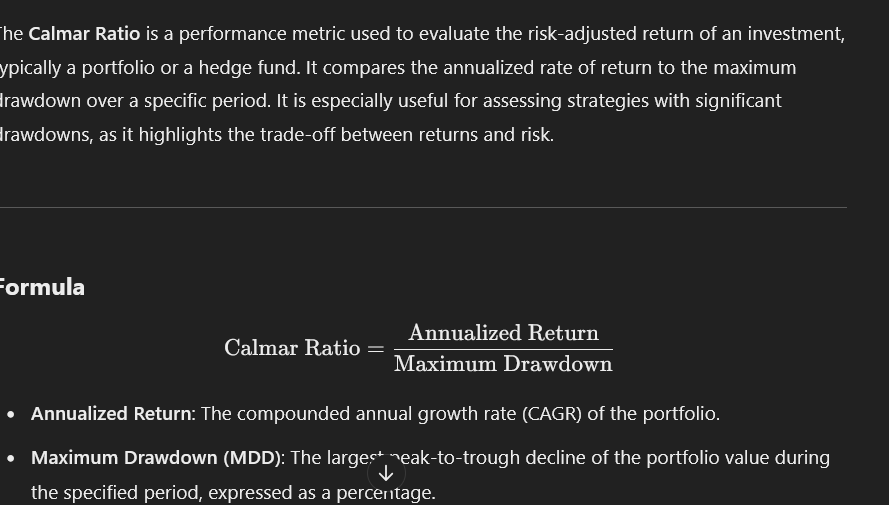

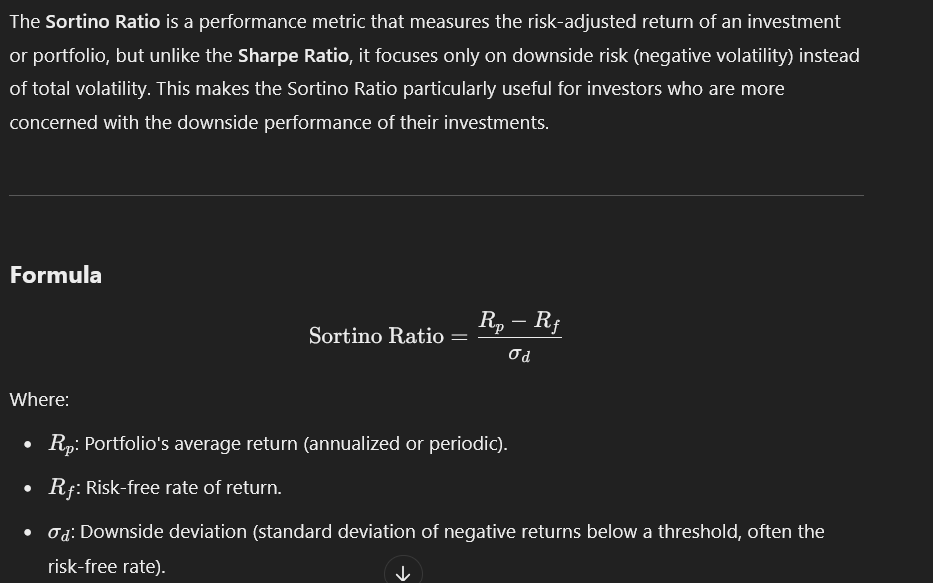

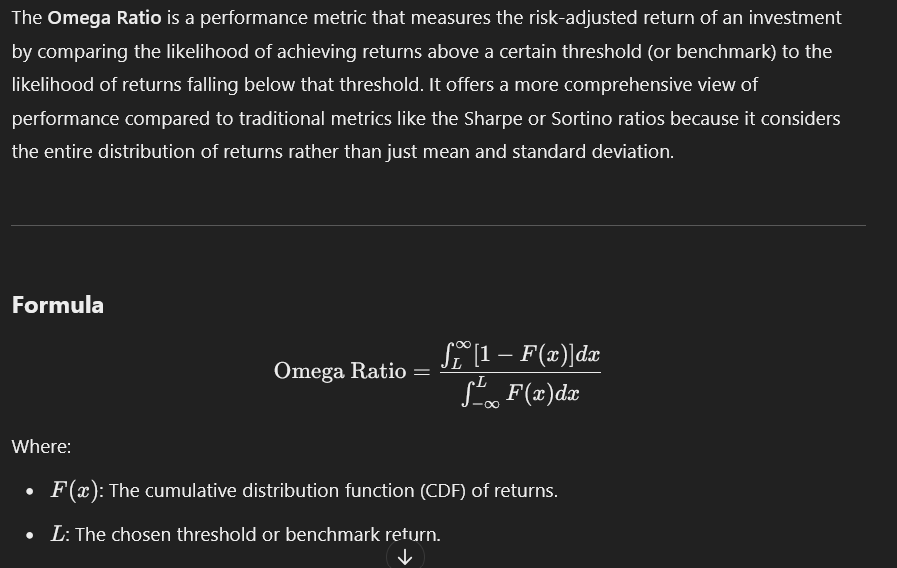

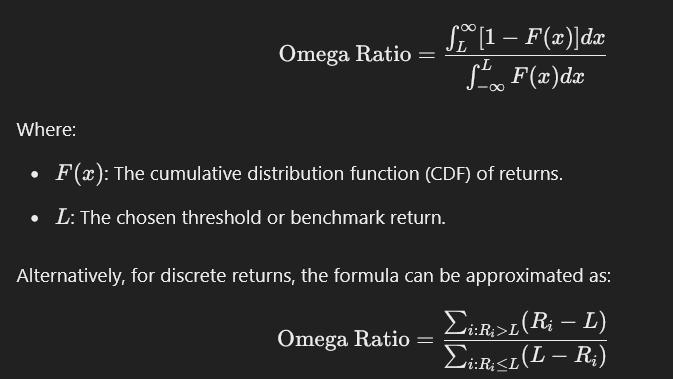